In [1]:
%matplotlib inline
import pylab as pl
import numpy as np
from sklearn.neighbors import KNeighborsClassifier #importing classifier analysing the data by K-nearest neighboring method

# Importing X(data.csv)

In [2]:
X=np.array(np.loadtxt("data.csv",delimiter=",",dtype=np.str)) #importing data.csv file into an array

samples_X=X[1:,0] #Extract sample name of the dataset
X=np.float_(X[1:,1:])#taking only the features without taking the sample & features names

samples_X_strip=samples_X #sample_X_strip is to define the elements of samples_X remain after removing the missing values



# Checking X (sample number, feature number and missing values) 

In [3]:
print("Number of samples of X: %d\t\t"%X.shape[0])
print("Number of features of X:%d\t\t"%X.shape[1])


missing_values=(np.isnan(X)).sum() #isnan() function, to check the missing values
print("Missing Values: %d\t\t"%missing_values)
percentage_missing=(missing_values/X.size)*100
print("Percentage of Missing values:%d\t\t"%percentage_missing)

Number of samples of X: 12060		
Number of features of X:801		
Missing Values: 0		
Percentage of Missing values:0		


# Importing y(toxicity_labels.csv)

In [4]:
y=[]  #starting point of y variable 
samples_y=[]  #starting point of the variable that defines the sample names


f=open("toxicity_labels.csv","r") #opens file toxicity_labels.csv on read only mode
for line in f:
    sv=line.strip().split(",")
    samples_y.append(str(sv[0]).replace("NA","NaN")) #replacing NA values into Not a Number(NaN) values in regard to represent the missing values in the data
    
    
    row=[]
    for element in sv:
        if element==0:
            continue
        row.append(str(element).replace("NA","NaN"))
    y.append(row)
    
f.close() #closes toxicity_labels.csv
y=np.array(y) #Converting y tuple into an array

y=np.float_(y[1:,1]) #extracting all samples with only our target NR.AhR label

samples_y=np.array(samples_y[1:])  ##assigning samples_y values into samples_y array




#### Removing missing values from X

In [9]:
X_strip=np.delete(X,sample_indices_to_remove,axis=0)
samples_X_strip=np.delete(samples_X_strip,sample_indices_to_remove,axis=0)
print(X_strip.shape) #number samples and features of y after removing the missing values defined by X_strip

(8441, 801)


# Remaining data Normalization

In [11]:
from sklearn.preprocessing import StandardScaler #here,StandardScaler is for data normalization which works by removing the mean(mean=0) and scaling each feature into unit variance (Standard deviation=1)
scaler=StandardScaler()
X_strip=scaler.fit_transform(X_strip) #fit is to calculating the mean and varience of each features and transform function returns the dataset produced by it
                                      #fit_transform is used together to improve the efficiency of the model

Generating figure to visualizing data normalization

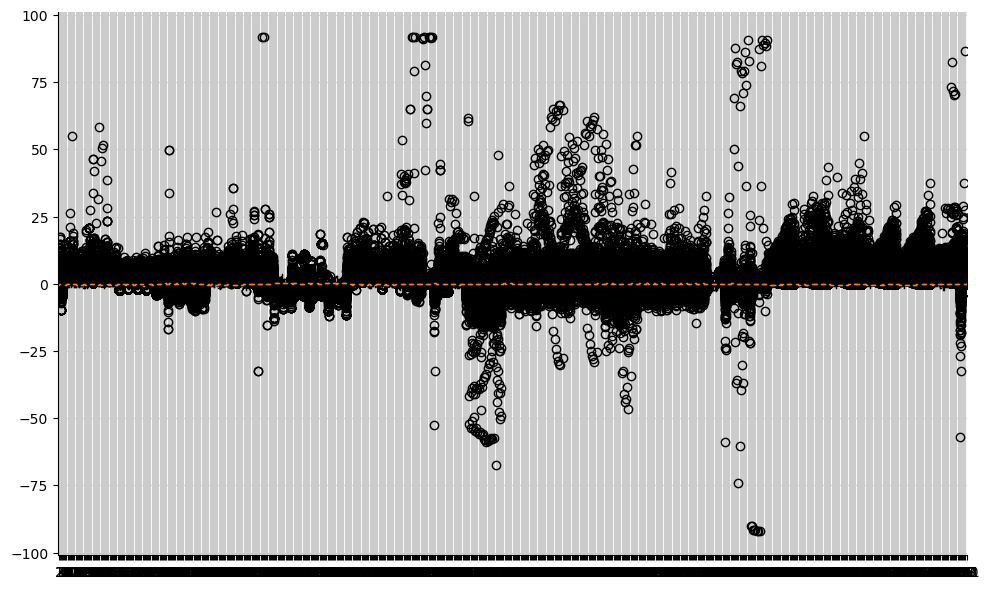

In [12]:
pl.figure(figsize=(10,6))
ax=pl.subplot(111)
ax.boxplot(X_strip)
ax.grid(color="#CCCCCC")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
pl.tight_layout()

# Data Training and Testing

- spliting the X_strip and y_strip into train and test data by defining X_strip_test, X_strip_train, y_strip_test, y_strip_train

- here, we have maintained the test size =0.2, that means we have 20% validation data and 80% training data


In [14]:
from sklearn.model_selection import train_test_split #train_test_split is for splitting the data arrays into train dataset and test dataset 
X_strip_train,X_strip_test,y_train,y_test=train_test_split(X_strip,y,test_size=0.2)

# Dimention Reduction and Principal Component Analysis of the dataset

In [15]:
#computation of the covariance metrix(C) into standarized data
n=X_strip.shape[0] #samples of X_strip
C=1/(n-1)*np.dot(X_strip_train.T,X_strip_train)

#eigendecompose the matrix C into its eigenvalues and eigenvectors
import numpy.linalg as linalg #linalg function is used to compute eigenvalues and eigenvectors of the squared array
d,V=linalg.eig(C) #eigenvalues d and eigenvectors V


ind=np.argsort(d)[::-1] #sorting the eigenvalues in the decreasing order
# resorting the columns of the eigenvector matrix V using the indices from the sorting of the eigenvalues
d=d[ind]
V=V[:,ind]


i=0
vaMax=0.9 #maximum variance 0.9 (90%)
ratios_variance_explained=d/d.sum() #computing ratio variance by eigenvalues
va=ratios_variance_explained[0:i].sum()

while va<=vaMax:
    va=ratios_variance_explained[0:i].sum()
    print("First %.2f account for %.2f%% of the total variance"%(i,va*100))
    i+=1

First 0.00 account for 0.00% of the total variance
First 1.00 account for 31.19% of the total variance
First 2.00 account for 37.92% of the total variance
First 3.00 account for 44.17% of the total variance
First 4.00 account for 49.32% of the total variance
First 5.00 account for 53.69% of the total variance
First 6.00 account for 57.06% of the total variance
First 7.00 account for 59.62% of the total variance
First 8.00 account for 61.94% of the total variance
First 9.00 account for 64.02% of the total variance
First 10.00 account for 65.63% of the total variance
First 11.00 account for 67.16% of the total variance
First 12.00 account for 68.53% of the total variance
First 13.00 account for 69.82% of the total variance
First 14.00 account for 71.00% of the total variance
First 15.00 account for 72.09% of the total variance
First 16.00 account for 73.07% of the total variance
First 17.00 account for 73.93% of the total variance
First 18.00 account for 74.72% of the total variance
Firs

With the eigenvector of \begin{align} \textbf{V}_r  = 60\end{align},

The reduced X is computed by:

\begin{align}
\textbf{X}_r = \textbf{X_strip} \textbf{V}_r
\end{align}

In [16]:
Xr=np.dot(X_strip,V[:,0:60]) #computing lower dimentional representation of out input data matrix

creating a bar chart to visualize the ratio variance explained for each Principal Component

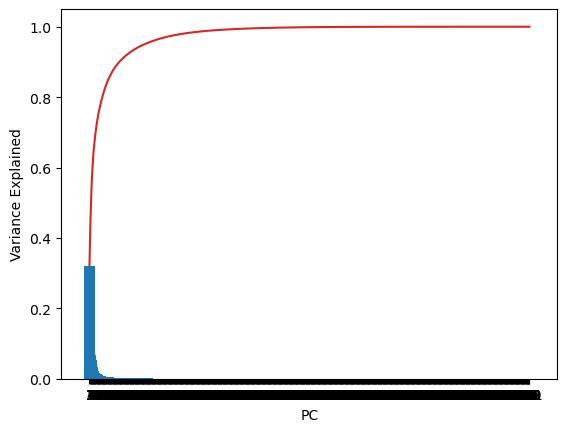

In [16]:
pl.plot(0,1)
xticks=np.arange(1,len(ratios_variance_explained)+1)
pl.bar(xticks,ratios_variance_explained,width=20)
pl.plot(xticks,np.cumsum(ratios_variance_explained),color="tab:red")
#pl.subplot(111)
#ax.grid(color="#CCCCCC")
pl.ylabel("Variance Explained")
pl.xlabel("PC")
pl.xticks(xticks)
pl.show()

# Model Evalution

# Logistic Regression

/home/pinky/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/pinky/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

Logistic Regression
ROC-AUC:	0.84 (+-0.02)
Accuracy:	0.94 (+-0.00)
Recall:		0.70 (+-0.04)
Precision:	0.79 (+-0.03)
MCC:		0.71 (+-0.02)


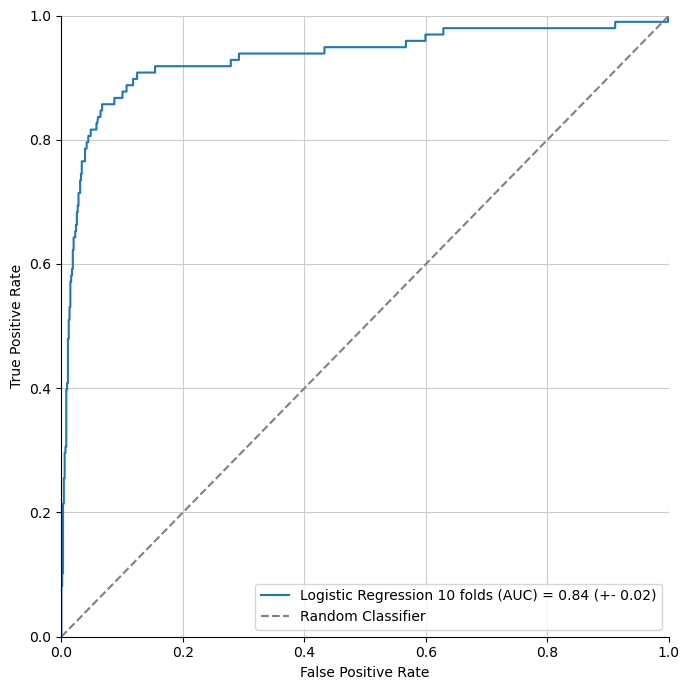

In [19]:
from sklearn import metrics  #metrics is used to monitor and measure the performance of the model
from sklearn.model_selection import StratifiedKFold  #StratifiedKFold is for cross validation by spliting data into train/test
from sklearn.linear_model import LogisticRegression #importing logisticregression for evaluting the model through logisticregression approach

#10 fold cross validation by stratifiedKFold
cv = StratifiedKFold(n_splits=10,shuffle=True,random_state=42)
#n_splits=10: means 10 fold cross validation, shuffle= True: means it will use each n_split parts as test set,
#random_state: for generating reproducible splits

list_fpr_lr = [] #list for false positive result of logistic regression
list_tpr_lr = [] #list for true positive result of logistic regression
auc_values_lr = []  #list for area under the curve of logistic regression 
precision_values = [] #list for precision values of logistic regression
recall_values = [] #list for recall values of logistic regression
accuracy_values = [] #list for accuracy values of logistic regression
mcc_values = [] #list for Matthews correlation coefficient values of logistic regression


#training data
#spliting X_strip and y_strip data for the logistic regression baesd on the cross validation by the startfied Kfold
for train_index, val_index in cv.split(X_strip,y_strip):
    #Split data
    X_strip_train = X_strip[train_index]
    X_strip_val = X_strip[val_index]
    y_train = y[train_index]
    y_val = y[val_index]
    
    #Train Model with simple logistic regression without any penalty
    model = LogisticRegression(penalty="none",max_iter=5000,solver="lbfgs")
#here penalty is none, maximum iteration for regulating the data optimization, solver="lbfgs" store last few updates to save the memory
    model.fit(X_strip_train,y_train) #train the model
    
    #compute metrics for ROC Curve
    scores = model.decision_function(X_strip_val)
    fpr, tpr, thresholds = metrics.roc_curve(y_val, scores, drop_intermediate=False)
    
    list_fpr_lr.append(fpr)
    list_tpr_lr.append(tpr)
    
    y_pred = model.predict(X_strip_val)
    auc_values_lr.append(metrics.roc_auc_score(y_val, y_pred))
    accuracy_values.append(metrics.accuracy_score(y_val, y_pred))
    recall_values.append(metrics.recall_score(y_val, y_pred))
    precision_values.append(metrics.precision_score(y_val, y_pred))
    mcc_values.append(metrics.matthews_corrcoef(y_val, y_pred))


#print results
print("Logistic Regression")
print("ROC-AUC:\t%.2f (+-%.2f)" % (np.mean(auc_values_lr),np.std(auc_values_lr)))
print("Accuracy:\t%.2f (+-%.2f)" % (np.mean(accuracy_values),np.std(accuracy_values)))
print("Recall:\t\t%.2f (+-%.2f)" % (np.mean(recall_values),np.std(recall_values)))
print("Precision:\t%.2f (+-%.2f)" % (np.mean(precision_values),np.std(precision_values)))
print("MCC:\t\t%.2f (+-%.2f)" % (np.mean(mcc_values),np.std(mcc_values)))

#logistic Regression with regularization
#generate figure
fig = pl.figure(figsize=(7,7)) #axis range
ax = fig.add_subplot(111) #plotting subplot

#plot roc curve for all 10 foldes
pl.plot(fpr, tpr,label="Logistic Regression 10 folds (AUC) = %.2f (+- %.2f)" % (np.mean(auc_values_lr),np.std(auc_values_lr)))



ax.plot([0,1], [0,1], color="grey",label="Random Classifier",linestyle="--")
#Set axis labels
ax.set_xlabel("False Positive Rate")
ax.set_ylabel("True Positive Rate")
#Set axis limits
ax.set_ylim(0,1)
ax.set_xlim(0,1)
#show grid in grey and set top and right axis to invisible
ax.grid(color="#CCCCCC")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
pl.legend()
pl.tight_layout()

# K-nearest neighboring

KNearst Neighbors
Average k: 2.80 (+- 1.47)
Average Accuracy (val): 0.90 (+- 0.00)
Average Accuracy (test): 0.91 (+- 0.00)
Average Precision (test): 0.71 (+- 0.06)
Average Recall (test): 0.39 (+- 0.11)
Average ROC-AUC (test): 0.68 (+- 0.05)
Average MCC (test): 0.48 (+- 0.04)


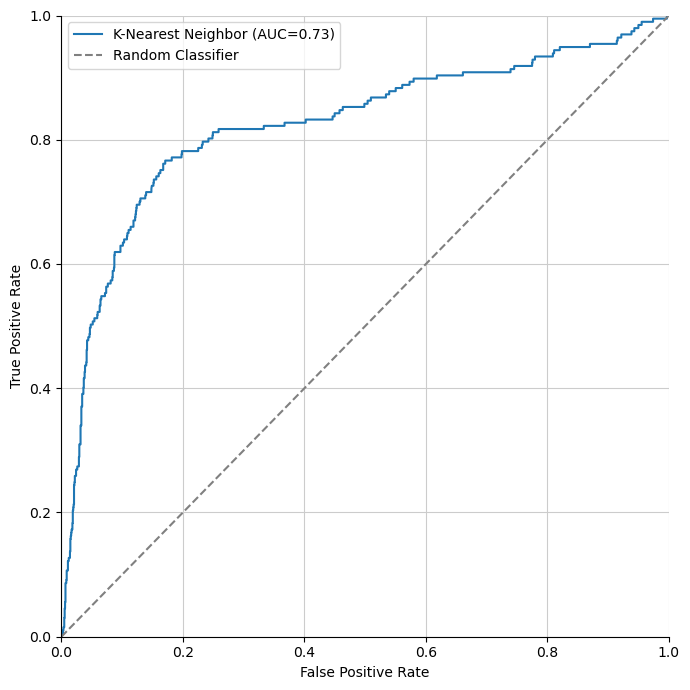

In [24]:
from sklearn.model_selection import StratifiedKFold  #StratifiedKFold is for cross validation by spliting data into train/test
from sklearn.model_selection import GridSearchCV #GridSearchCV use the cross validation method to evaluate the model by trying all the combination of the values passed in the dictonary
from sklearn.model_selection import train_test_split
from sklearn import metrics #metrics is used to monitor and measure the performance of the model
 

#spliting train/testing data into 5 folds
kf = StratifiedKFold(n_splits=5,random_state=42,shuffle=True)
#n_splits=5: means 5 fold cross validation, shuffle= True: means it will use each n_split parts as test set,
#random_state: for generating reproducible splits

best_acc_val=[]   #checking the accuracy in the validation data
best_acc_test=[] #checking the accuracy in the test data
best_neighbors=[]    #finding the best k-neighbor value
best_precision_test=[] #checking the precision value of test data
best_recall_test=[]  #checkig the recall value of the test data
best_mcc_test=[]   #checking the mcc value of the test data
best_auc_test=[]  #checking Area under the curve (AUC) values of the test data

#training data
#spliting X_strip and y_strip data for the knn (data after removing the missing values from X and y)
for train_index,test_index in kf.split(X_strip,y):
    X_strip_train=X_strip[train_index]
    X_strip_test=X_strip[test_index]
    y_train=y_strip[train_index]
    y_test=y_strip[test_index]
    
    #create train-test split for hyperparameter optimization
    X_strip_subtrain,X_strip_val,y_subtrain,y_val=train_test_split(X_strip_train,y_train,test_size=0.2,random_state=42)
    neighbors=np.arange(1,1076)   #create a pool for how many neighbors we like to consider
    
    acc_train=[]      #checking the accuracy of the train data
    acc_val=[]   #checking the accuracy of the calidation data
    
    scores = model.decision_function(X_strip_test)   #scoring for selecting the best model
    fpr, tpr, thresholds = metrics.roc_curve(y_test, scores, drop_intermediate=False)


    #predicting best k neighbor
    for k in neighbors:
        knn=KNeighborsClassifier(n_neighbors=k,metric="minkowski",p=2)
#metric= minkowski is used because knn use distance to find similarities or dissimilarities of the data and minkowski is the generalization of Euclidean distance
#Parameter P value of Minkowski distance set to Euclidian distance

        knn.fit(X_strip_subtrain,y_subtrain)     #for training we provide the X_subtrain & y_subtrain, since we haven't optimized the hyperparameter yet              
        predictions_training=knn.predict(X_strip_subtrain) #predict for the X_subtrain
        predictions_testing=knn.predict(X_strip_val)  #predict for the test value of X_subtrain of this particular split, which is X_val
        
        #store accuracy
        acc_train.append(metrics.accuracy_score(y_subtrain,predictions_training))
        acc_val.append(metrics.accuracy_score(y_val,predictions_testing))
        
    #store information to best model in line-search
    best_k=neighbors[np.argmax(acc_val)]
    best_neighbors.append(best_k)
    best_acc_val.append(acc_val[np.argmax(acc_val)])
    
    #retrain Model with best k and predict on test data
    knn=KNeighborsClassifier(n_neighbors=best_k,metric="minkowski",p=2)
    knn.fit(X_strip_train,y_train) #for training we provide the X_strip_train & y_strip_train from the first split done before data reduction step
    y_prediction=knn.predict(X_strip_test)
    test_accuracy=metrics.accuracy_score(y_test,y_prediction)
    #getting all the best scorings for each scoring scheme
    best_acc_test.append(test_accuracy)
    best_precision_test.append(metrics.precision_score(y_test,y_prediction))
    best_recall_test.append(metrics.recall_score(y_test,y_prediction))
    best_mcc_test.append(metrics.matthews_corrcoef(y_test,y_prediction))
    best_auc_test.append(metrics.roc_auc_score(y_test,y_prediction))
    
best_neighbors=np.array(best_neighbors)
best_acc_val=np.array(best_acc_val)
best_acc_test=np.array(best_acc_test)
best_precision_test=np.array(best_precision_test)
best_recall_test=np.array(best_recall_test)
best_auc_test=np.array(best_auc_test)
best_mcc_test=np.array(best_mcc_test)
        
print("KNearst Neighbors")

print("Average k: %.2f (+- %.2f)" % (best_neighbors.mean(),best_neighbors.std()))
print("Average Accuracy (val): %.2f (+- %.2f)" % (best_acc_val.mean(),best_acc_val.std()))
print("Average Accuracy (test): %.2f (+- %.2f)" % (best_acc_test.mean(),best_acc_test.std()))
print("Average Precision (test): %.2f (+- %.2f)" % (best_precision_test.mean(),best_precision_test.std()))
print("Average Recall (test): %.2f (+- %.2f)" % (best_recall_test.mean(),best_recall_test.std()))
print("Average ROC-AUC (test): %.2f (+- %.2f)" % (best_auc_test.mean(),best_auc_test.std()))
print("Average MCC (test): %.2f (+- %.2f)" % (best_mcc_test.mean(),best_mcc_test.std()))

#generate figure
fig = pl.figure(figsize=(7,7)) #axis of the plot
ax = fig.add_subplot(111) #adding subplot

#plot roc curve for all 10 foldes
pl.plot(fpr, tpr, label="K-Nearest Neighbor (AUC=%.2f)" % metrics.roc_auc_score(y_strip_test, y_pred))
ax.plot([0,1], [0,1], color="grey",label="Random Classifier",linestyle="--")

#Set axis labels
ax.set_xlabel("False Positive Rate")
ax.set_ylabel("True Positive Rate")
#Set axis limits
ax.set_ylim(0,1)
ax.set_xlim(0,1)
#show grid in grey and set top and right axis to invisible
ax.grid(color="#CCCCCC")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
pl.legend()
pl.tight_layout()

# Support Vector Machine Using Linear Kernal

In [24]:
from sklearn.model_selection import GridSearchCV  #StratifiedKFold is for cross validation by spliting data into train/test
from sklearn.svm import SVC #SVC is the support vector machine algorithm for the multiclass problem

params = {"C": np.logspace(-4,4,10)} #The dictionary has one key "C". C can take 10 different values in log-scale

#10 fold cross validation by stratifiedKFold
cv = StratifiedKFold(n_splits=10,shuffle=True,random_state=42)
#n_splits=10 means 10 folds cross validation, shuffle is true means it will move to each of the fold,random_state ensure that the splits are reproducible

list_fpr_svm = [] #list for false positive result of svm
list_tpr_svm = [] #list for true positive result of svm
auc_values_svm = [] #list for area under the curve of svm
precision_values = [] 
recall_values = []
accuracy_values = []
mcc_values = []

####### cross validation by train and validation data spliting X_strip (data after removing missing values of X) and y_strip(data after removing missing values of y)
for train_index, val_index in cv.split(X_strip,y):
    #Split data
    X_strip_train = X_strip[train_index]
    X_strip_val = X_strip[val_index]
    y_train = y[train_index]
    y_val = y[val_index]
    
    #Train Model by linear kernel
    svc = SVC(kernel="linear")
    #gridsearch is used for finding out optimal hyperparameters of a model which results in the most accurate prediction
    #gridsearchCV through hyperperameter loop fit model on the training set
    gridsearch = GridSearchCV(svc,params, cv=2, scoring="accuracy") #cross validation iterators of 2 folds
    #the scoring is based on the scoring arguments, such as here "accuracy" metrics scorer 
    gridsearch.fit(X_strip_train,y_train)
    
    #compute metrics for ROC Curve
    scores = gridsearch.decision_function(X_strip_val)
    fpr, tpr, thresholds = metrics.roc_curve(y_val, scores, drop_intermediate=False)
    
    list_fpr_svm.append(fpr)
    list_tpr_svm.append(tpr)
    
    y_pred = gridsearch.predict(X_strip_val)
    auc_values_svm.append(metrics.roc_auc_score(y_val, y_pred))
    accuracy_values.append(metrics.accuracy_score(y_val, y_pred))
    recall_values.append(metrics.recall_score(y_val, y_pred))
    precision_values.append(metrics.precision_score(y_val, y_pred))
    mcc_values.append(metrics.matthews_corrcoef(y_val, y_pred))


#print results
print("SVM Linear Kernel")
print("ROC-AUC:\t%.2f (+-%.2f)" % (np.mean(auc_values_svm),np.std(auc_values_svm)))
print("Accuracy:\t%.2f (+-%.2f)" % (np.mean(accuracy_values),np.std(accuracy_values)))
print("Recall:\t\t%.2f (+-%.2f)" % (np.mean(recall_values),np.std(recall_values)))
print("Precision:\t%.2f (+-%.2f)" % (np.mean(precision_values),np.std(precision_values)))
print("MCC:\t\t%.2f (+-%.2f)" % (np.mean(mcc_values),np.std(mcc_values)))

SVM Linear Kernel
ROC-AUC:	0.73 (+-0.02)
Accuracy:	0.92 (+-0.01)
Recall:		0.47 (+-0.05)
Precision:	0.79 (+-0.04)
MCC:		0.57 (+-0.04)


Generate plot for SVM (Linear Kernel)

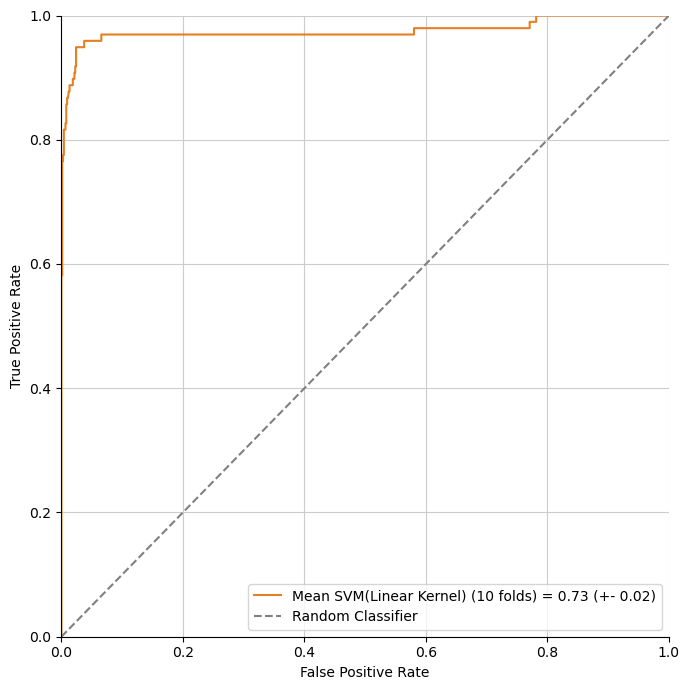

In [28]:
fig = pl.figure(figsize=(7,7)) #represent axis
ax = fig.add_subplot(111) #adding subplot

#plot roc curve for all 10 foldes
pl.plot(fpr, tpr, color="#e67e22",label="Mean SVM(Linear Kernel) (10 folds) = %.2f (+- %.2f)" % (np.mean(auc_values_svm),np.std(auc_values_svm)))
ax.plot([0,1], [0,1], color="grey",label="Random Classifier",linestyle="--")


#Set axis labels
ax.set_xlabel("False Positive Rate")
ax.set_ylabel("True Positive Rate")
#Set axis limits
ax.set_ylim(0,1)
ax.set_xlim(0,1)

#show grid in grey and set top and right axis to invisible
ax.grid(color="#CCCCCC")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
pl.legend() #add legend
pl.tight_layout()


# Support vector mechine using RBF-kernel

In [27]:
from sklearn.svm import SVC

#Create a dictionary for:-
#An array of C values, where C can take 10 different values from log-scale of -4 to 4
# addition parameter gamma needed for rbf kernel, which defines how far the single training data can reach
params = {"C": np.logspace(-4,4,10),
          "gamma": np.logspace(-4,4,10)} 



#10 fold cross validation by stratifiedKFold
cv = StratifiedKFold(n_splits=10,shuffle=True,random_state=42)
#n_splits=10 means 10 folds cross validation, shuffle is true means it will move to each of the fold,random_state ensure that the splits are reproducible


list_fpr_svm_rbf = [] #list for false positive result of svm rbf kernel
list_tpr_svm_rbf = [] #list for true postitive result of svm rbf kernel
auc_values_svm_rbf = [] #list for area under the curve of svm rbf kernel
precision_values = [] #list for precision values of svm rbf kernel
recall_values = [] #list for recall values of svm rbf kernel
accuracy_values = [] #list for accuracy values of svm rbf kernel
mcc_values = [] #list for mcc values of svm rbf kernel

####### cross validation by train and validation data spliting X_strip and y_strip
for train_index, val_index in cv.split(X_strip,y):
    #Split data
    X_strip_train = X_strip[train_index]
    X_strip_val = X_strip[val_index]
    y_train = y[train_index]
    y_val = y[val_index]
    
    #Train Model by rbf kernel
    svc = SVC(kernel="rbf")
    #gridsearch is used for finding out optimal hyperparameters of a model which results in the most accurate prediction
    #gridsearchCV through hyperperameter loop fit model on the training set
    gridsearch = GridSearchCV(svc,params, cv=2, scoring="accuracy")  #cross validation iterators of 2 folds
    #the scoring is based on the scoring arguments, such as here "accuracy" metrics scorer 
    gridsearch.fit(X_strip_train,y_train)
    
    #compute metrics for ROC Curve
    scores = gridsearch.decision_function(X_strip_val)
    fpr, tpr, thresholds = metrics.roc_curve(y_val, scores, drop_intermediate=False)
    
    list_fpr_svm_rbf.append(fpr)
    list_tpr_svm_rbf.append(tpr)
    
    y_pred = gridsearch.predict(X_strip_val)
    auc_values_svm_rbf.append(metrics.roc_auc_score(y_val, y_pred))
    accuracy_values.append(metrics.accuracy_score(y_val, y_pred))
    recall_values.append(metrics.recall_score(y_val, y_pred))
    precision_values.append(metrics.precision_score(y_val, y_pred))
    mcc_values.append(metrics.matthews_corrcoef(y_val, y_pred))


#print results
print("SVM with a RBF")
print("ROC-AUC:\t%.2f (+-%.2f)" % (np.mean(auc_values_svm_rbf),np.std(auc_values_svm_rbf)))
print("Accuracy:\t%.2f (+-%.2f)" % (np.mean(accuracy_values),np.std(accuracy_values)))
print("Recall:\t\t%.2f (+-%.2f)" % (np.mean(recall_values),np.std(recall_values)))
print("Precision:\t%.2f (+-%.2f)" % (np.mean(precision_values),np.std(precision_values)))
print("MCC:\t\t%.2f (+-%.2f)" % (np.mean(mcc_values),np.std(mcc_values)))

SVM with a RBF
ROC-AUC:	0.92 (+-0.02)
Accuracy:	0.98 (+-0.01)
Recall:		0.84 (+-0.05)
Precision:	0.95 (+-0.02)
MCC:		0.88 (+-0.03)


Generate plot for SVM (RBF Kernel)

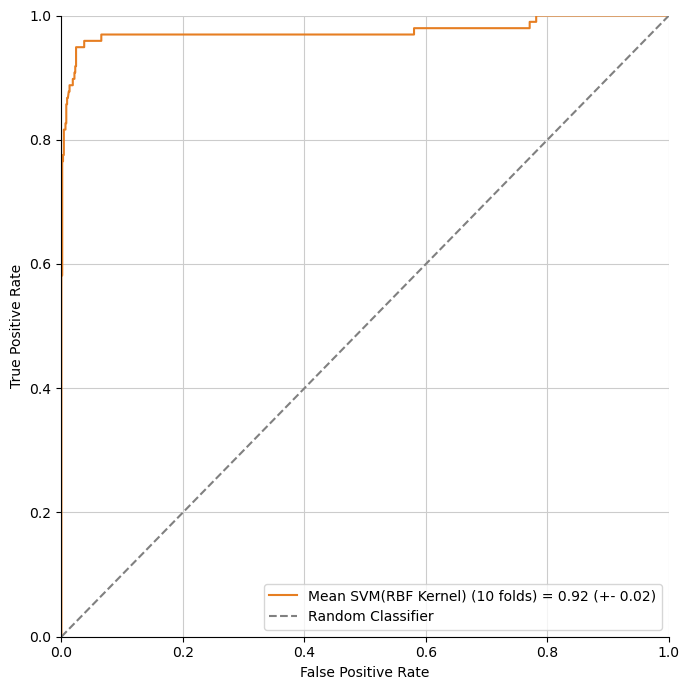

In [30]:
fig = pl.figure(figsize=(7,7))  #represent axis
ax = fig.add_subplot(111) #adding subplot

#plot roc curve for all 10 foldes
pl.plot(fpr, tpr, color="#e67e22",label="Mean SVM(RBF Kernel) (10 folds) = %.2f (+- %.2f)" % (np.mean(auc_values_svm_rbf),np.std(auc_values_svm_rbf)))
ax.plot([0,1], [0,1], color="grey",label="Random Classifier",linestyle="--")


#Set axis labels
ax.set_xlabel("False Positive Rate")
ax.set_ylabel("True Positive Rate")
#Set axis limits
ax.set_ylim(0,1)
ax.set_xlim(0,1)

#show grid in grey and set top and right axis to invisible
ax.grid(color="#CCCCCC")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
pl.legend()
pl.tight_layout()

# Importing Unknown data and Prediction of Toxicity

In [23]:
unknown = np.array(np.loadtxt("unknown_data.csv", delimiter=",", dtype = np.str)) #imporing unknown_data.csv into array
unknown_sample=unknown[1:,0] #sample elements(names) of the unknown data
unknown=np.float_(unknown[1:,1:]) #converting unknown string data (excluding the feature and label names) into float data 


Checking Unknown data ( Sample number, feature number and missing values)

In [24]:
print("Number of samples of Unknown data:%d\t\t"%unknown.shape[0]) #unknown samples
print("Number of features of unknown data:%d\t\t"%unknown.shape[1]) #unknown features
missing_values=(np.isnan(unknown)).sum() #isnan() for checking missing values of unknown data
print("Missing values of unknown: %d \t\t"%missing_values)
percentage_missing=(missing_values/unknown.size)*100
print("Percentage of Missing values of unknown: %d\t\t"%percentage_missing)

Number of samples of Unknown data:610		
Number of features of unknown data:801		
Missing values of unknown: 0 		
Percentage of Missing values of unknown: 0		


### Normalizing Unknown data

In [25]:
unknown = scaler.fit_transform(unknown)  #fit is to calculating the mean and varience of each features and transform function returns the dataset produced by it
                                      #fit_transform is used together to improve the efficiency of the model
                                #scaler for data normalization

 ### Predicting y label for Unknown data

In [ ]:
y_unknown = gridsearch.predict(unknown)

### Generating CSV file

Generating definition output for CSV file

In [ ]:
i = 0
output = ""
for val in unknown_sample:
    output = output + str(unknown_sample[i]) + "," +str(int(y_unknown[i])) + "\n"
    i += 1

In [ ]:
import os
try: os.remove("Unkwon_RBF.csv") #removes file Unkwon_RBF.csv, if it exists
except: pass # passes if the file doesn't exist
open("Unkwon_RBF_88 .csv", 'a').write(str(output)) #opens the file & writes the definition output into it